Applying power log transformation, image negative and threshold on a test images

In [1]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [3]:
image=io.imread("lenna_grey.jpg")
print(image.shape)
image=rgb2gray(image)
image=255*image # Denormalizing the image
image.shape

(225, 225, 3)


(225, 225)

Text(0.5, 1.0, 'Orignal image')

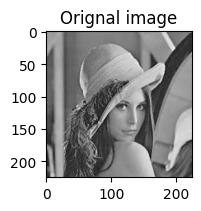

In [5]:
plt.figure()
plt.subplot(1,3,1) # 1 row 3 column and 1st image
plt.imshow(image, cmap="gray")
plt.title('Orignal image')

In [6]:
# Creating power function to apply power transfromation
def pwr(r,g):
  s = r**g
  return s

In [7]:
[row,col] = image.shape

In [8]:
im = pwr(image,0.8)
im

array([[57.98237309, 57.69227958, 57.69227958, ..., 60.00302934,
        63.42820553, 50.0128165 ],
       [57.69227958, 57.69227958, 57.69227958, ..., 59.13915004,
        59.13915004, 44.52031949],
       [57.69227958, 57.69227958, 57.69227958, ..., 45.75489564,
        40.76334173, 25.0351629 ],
       ...,
       [21.01696549, 23.23037074, 24.67687445, ..., 33.3021283 ,
        35.94066742, 37.24176556],
       [21.01696549, 23.59405975, 25.0351629 , ..., 36.59266228,
        38.21016246, 38.21016246],
       [21.01696549, 21.76097181, 23.23037074, ..., 39.49191155,
        41.71043241, 42.65217656]])

or

In [9]:
g = 0.5
image_gamma1 = image.copy()
for rw in range(0,row):
  for cl in range(0,col):
    temp = image_gamma1[rw,cl]
    temp_gamma = pwr(temp,g)
    image_gamma1[rw,cl] = temp_gamma

In [10]:
g = 1.5
image_gamma2 = image.copy()
for rw in range(0,row):
  for cl in range(0,col):
    temp = image_gamma2[rw,cl]
    temp_gamma = pwr(temp,g)
    image_gamma2[rw,cl] = temp_gamma

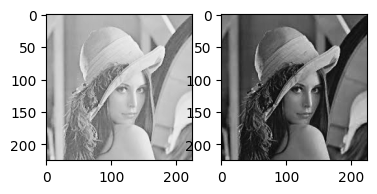

In [11]:
plt.subplot(1,3,2)
plt.imshow(image_gamma1,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(image_gamma2,cmap='gray')

Image negative

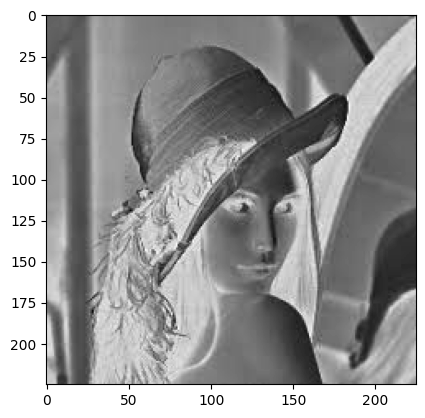

In [12]:
image_neg = image.copy()
image_neg = 255 - image_neg
plt.imshow(image_neg,cmap="gray")

or

Text(0.5, 1.0, 'Negative')

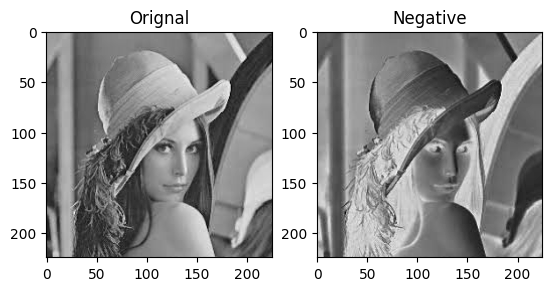

In [14]:
image_negative = image.copy()
row,col = image_negative.shape
for rw in range(0,row):
  for cl in range(0,col):
    temp1 = image_negative[rw,cl]
    temp_negative = 255-temp1
    image_negative[rw,cl] = temp_negative
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image,cmap="gray")
plt.title("Orignal")
plt.subplot(1,2,2)
plt.imshow(image_negative,cmap="gray")
plt.title("Negative")

In [16]:
image = io.imread('watch.png')
image = rgb2gray(image)
image = 255*image
[row,col] = image.shape
th=100

In [22]:
image_th1 = image.copy()

In [23]:
for rw in range(0,row):
  for cl in range(0,col):
    temp = image[rw,cl]
    if temp>th:
      image_th1[rw,cl]=255

In [24]:
image_th2 = image.copy()
th=100
for rw in range(0,row):
  for cl in range(0,col):
    temp = image[rw,cl]
    if temp>th:
      image_th2[rw,cl]=255
    else:
      image_th2[rw,cl]=0

Text(0.5, 1.0, 'Threshold 2')

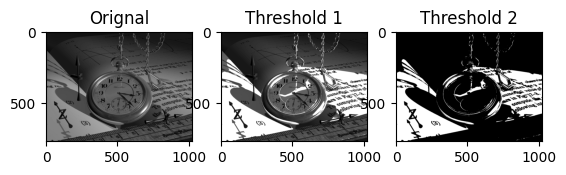

In [25]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(image,cmap="gray")
plt.title("Orignal")
plt.subplot(1,3,2)
plt.imshow(image_th1,cmap="gray")
plt.title("Threshold 1")
plt.subplot(1,3,3)
plt.imshow(image_th2,cmap="gray")
plt.title("Threshold 2")

Power log transformation is applied on the test image and the image looks lighter when the value of gamma<1 and image looks darker when value of gamma>1. Image operation is applied to the given test image which changes bright image to dark image. Image thresholding is applied on the given test image for threshold of 100 the pixels with intesity more than 100 are converted to white and remaining pixels are unchanged and second threshold, threshold of 100 is used to convert givne gray scale image to binary.